In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
deliveries = pd.read_csv('D:\\Downloads\\IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('D:\\Downloads\\IPL Matches 2008-2020.csv')

# Player Vs Team Comparison

In [63]:
def Player_team_comparision():
    player = input("Enter player name:- ") 
    Ball_by_ball= deliveries[deliveries['batsman']== player] 
    team= input("Enter oppenent name:- ") 
    Ball_by_ball =  Ball_by_ball[Ball_by_ball['bowling_team'] == team]
    unique_matches = Ball_by_ball['id'].unique().tolist()
    unique_matches_1 =[]
    for id_match in unique_matches:
        df = matches[matches['id']==id_match]
        unique_matches_1.append(df.iloc[0])
    unique_df = pd.DataFrame(unique_matches_1)
    unique_df['date'] = pd.to_datetime(unique_df['date'])
    unique_df= unique_df.sort_values(by='date')
    runs=[]
    for index, row in unique_df.iterrows():
        match_id= row['id']
        temp = Ball_by_ball[(Ball_by_ball['id'] == match_id) & (Ball_by_ball['batsman'] == player)]
        runs_scored = temp['batsman_runs'].sum()
        runs.append(runs_scored)
    unique_df['runs']= runs    
   
    balls=[]
    SR= []
    first_10= []
    ten_to_30= []
    thirty_plus= []
    for index, row in unique_df.iterrows():
        match_id= row['id']
        temp = Ball_by_ball[(Ball_by_ball['id'] == match_id) & (Ball_by_ball['batsman'] == player)]
        temp2= temp[temp['extra_runs']==0]
        balls_bowled = len(temp[temp['extra_runs']==0])
        balls.append(balls_bowled)
        if balls_bowled <= 10:
            first_10.append(temp['batsman_runs'].sum())
            ten_to_30.append(0)
            thirty_plus.append(0)
        elif balls_bowled > 10 and balls_bowled <= 30:
            first_10.append(temp2.iloc[0:10]['batsman_runs'].sum())
            ten_to_30.append(temp2.iloc[10:30]['batsman_runs'].sum())
            thirty_plus.append(0)
        else:
            first_10.append(temp2.iloc[0:10]['batsman_runs'].sum())
            ten_to_30.append(temp2.iloc[10:30]['batsman_runs'].sum())
            thirty_plus.append(temp2.iloc[30:]['batsman_runs'].sum())
    unique_df['balls']= balls
    unique_df['first_10']= first_10
    unique_df['ten_to_thirty']= ten_to_30
    unique_df['thirty_plus'] = thirty_plus
    for index, row in unique_df.iterrows():
        temp_sr= row['runs']/row['balls']*100
        SR.append(temp_sr)
    unique_df['SR']= SR
    
    unique_df['season']= unique_df['date'].dt.year
    
    group_season= unique_df.groupby(['season'])
    data_final = group_season.mean()
    data_final
    #Highest runs in different phases
    HS_first10 = max(unique_df["first_10"])
    HS_tenTothirty = max(unique_df["ten_to_thirty"])
    HS_thirtyplus = max(unique_df["thirty_plus"])
    HS_overall = max(unique_df["runs"])
    print("Highest runs scored by "+ player + ' against '+ team + ' is', HS_overall)
    print("Highest runs scored in first 10 balls by "+ player + ' against '+ team + ' is', HS_first10)
    print("Highest runs scored in 10 to 30 balls by "+ player + ' against '+ team + ' is', HS_tenTothirty)
    print("Highest runs scored after 30 balls by "+ player + ' against '+ team + ' is', HS_thirtyplus)
    
    #Avg runs scored by batsmen against team
    Seasons = data_final.index.tolist()
    Score = data_final['runs']
    ax=sns.barplot(x=Seasons,y=Score)
    ax.set_ylabel('Scores')
    ax.set_xlabel('Seasons')
    ax.set_title('Avg Runs scored by '+ player)
    plt.show()

    #Avg SR of batsmen against team
    SR = data_final['SR']
    ax=sns.barplot(x=Seasons,y=SR)
    ax.set_ylabel('SR')
    ax.set_xlabel('Seasons')
    ax.set_title('Avg SR of '+ player)
    plt.show()

Enter player name:- V Kohli
Enter oppenent name:- Mumbai Indians
Highest runs scored by V Kohli against Mumbai Indians is 92
Highest runs scored in first 10 balls by V Kohli against Mumbai Indians is 18
Highest runs scored in 10 to 30 balls by V Kohli against Mumbai Indians is 35
Highest runs scored after 30 balls by V Kohli against Mumbai Indians is 43


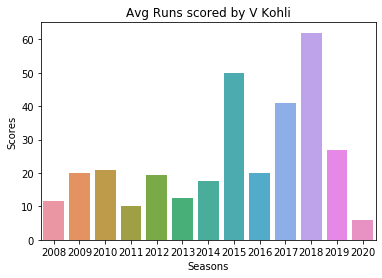

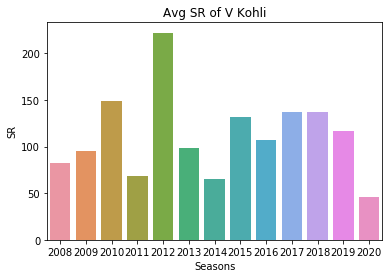

In [64]:
Player_team_comparision()